In [14]:
from pathlib import Path 
import numpy as np
from skimage import io
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
path = "D:\\David\\2025-02-25\\2025-02-25"

path = Path(path) / "tommy/segmentations"

alive_files = [file for file in path.glob("*") if "c11" in file.stem]

data_ids = []
data_alive = []
data_dead = []
data_both = []

for alive_file in tqdm(alive_files):
    dead_file = alive_file.parent / f"{alive_file.stem[:-3]}c14.tif"
    both_file = alive_file.parent / f"{alive_file.stem[:-3]}c8.tif"

    alive = io.imread(alive_file)
    dead = io.imread(dead_file)
    both = io.imread(both_file)

    unq_both = np.unique(both)
    unq_dead = np.unique(dead)
    unq_alive = np.unique(alive)


    assert set(unq_both) == set(unq_dead) | set(unq_alive)
    #assert set(unq_alive).isdisjoint(set(unq_dead))
    assert np.sum(np.logical_and(alive==dead, alive != 0)) == 0
    assert 0 in unq_dead
    assert 0 in unq_both
    assert 0 in unq_alive

    # for id_both in set(unq_dead) & set(unq_alive):
    #     assert np.sum(alive == id_both) >= np.sum(dead == id_both)

    idx = str(alive_file.stem).rfind("c")
    id = alive_file.stem[:idx]
    

    data_ids.append(id)
    data_alive.append(len(unq_alive) - 1)
    data_dead.append(len(unq_dead) - 1)
    data_both.append(len(unq_both) - 1)

    

data = {"id": data_ids, "alive_count": data_alive, "dead_count": data_dead, "count": data_both}
df = pd.DataFrame(data)

df["discrepancy"] = df["alive_count"] + df["dead_count"] - df["count"]


100%|██████████| 180/180 [00:34<00:00,  5.29it/s]


(array([  1.,   1.,   1.,   1.,   1.,   4.,   6.,   7.,  38., 120.]),
 array([-0.03448276, -0.03103448, -0.02758621, -0.02413793, -0.02068966,
        -0.01724138, -0.0137931 , -0.01034483, -0.00689655, -0.00344828,
         0.        ]),
 <BarContainer object of 10 artists>)

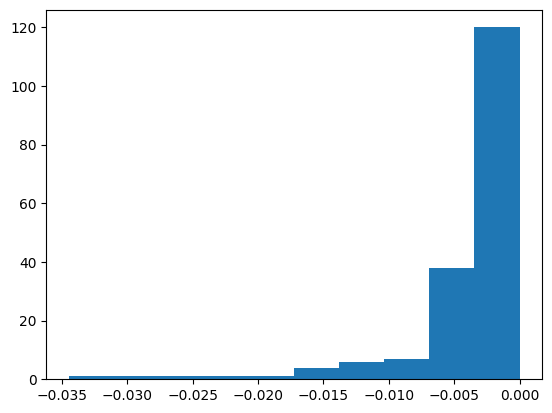

In [81]:
df["sum"] = df["alive_count"] + df["dead_count"]
df["discrepancy"] = df["count"] - df["sum"]
df["discrepancy frac."] = df["discrepancy"] / df["count"]
plt.hist(df["discrepancy frac."])

In [82]:

df.to_csv(path.parents[0] / "cell_counts.csv")

In [56]:
path

WindowsPath('D:/David/2024-06-27/tommy/segmentations')

In [ ]:
import napari

viewer = napari.Viewer()
viewer.add_labels(alive)

viewer.add_labels(dead)

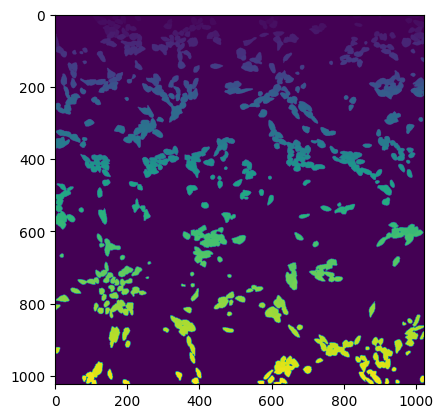

In [15]:
plt.imshow(alive)

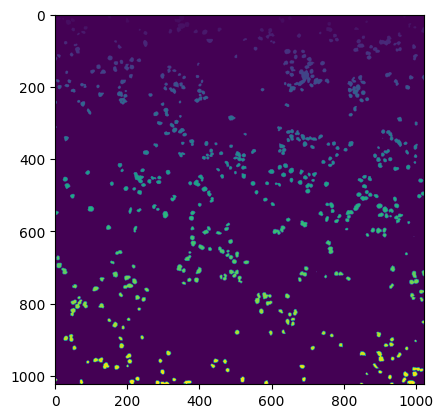

In [16]:
plt.imshow(dead)

In [25]:
matches = np.logical_and(alive==dead, alive != 0)
np.sum(matches)

0

In [26]:
id

'Experiment 1 zprojection-Linear Unmixing-01_s171'

In [29]:
len(unq_alive) + len(unq_dead) - 2

1330